In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pymc.sampling_jax
import xarray as xr
import pingouin as pg
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
data = bmb.load_data("sleepstudy")
data.head()

Reaction  Days  Subject
0  249.5600     0      308
1  258.7047     1      308
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308

In [4]:
data = data[data['Days'].isin([0, 1]) == False]
data.head()

Reaction  Days  Subject
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308
5  414.6901     5      308
6  382.2038     6      308

In [5]:
def plot_data(data):
    fig, axes = plt.subplots(3, 6, figsize=(16, 8), sharey=True, sharex=True, dpi=300, constrained_layout=True)
    fig.subplots_adjust(left=0.075, right=0.975, bottom=0.075, top=0.925, wspace=0.03)

    axes_flat = axes.ravel()

    for i, subject in enumerate(data["Subject"].unique()):
        ax = axes_flat[i]
        idx = data.index[data["Subject"] == subject].tolist()
        days = data.loc[idx, "Days"].values
        reaction = data.loc[idx, "Reaction"].values

        # Plot observed data points
        ax.scatter(days, reaction, color="C0", ec="black", alpha=0.7)

        # Add a title
        ax.set_title(f"Subject: {subject}", fontsize=14)

    # Remove axis labels for individual plots
    for ax in axes_flat:
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Set x-axis ticks for the last row
    for ax in axes[-1]:
        ax.xaxis.set_ticks([0, 2, 4, 6, 8])

    return axes

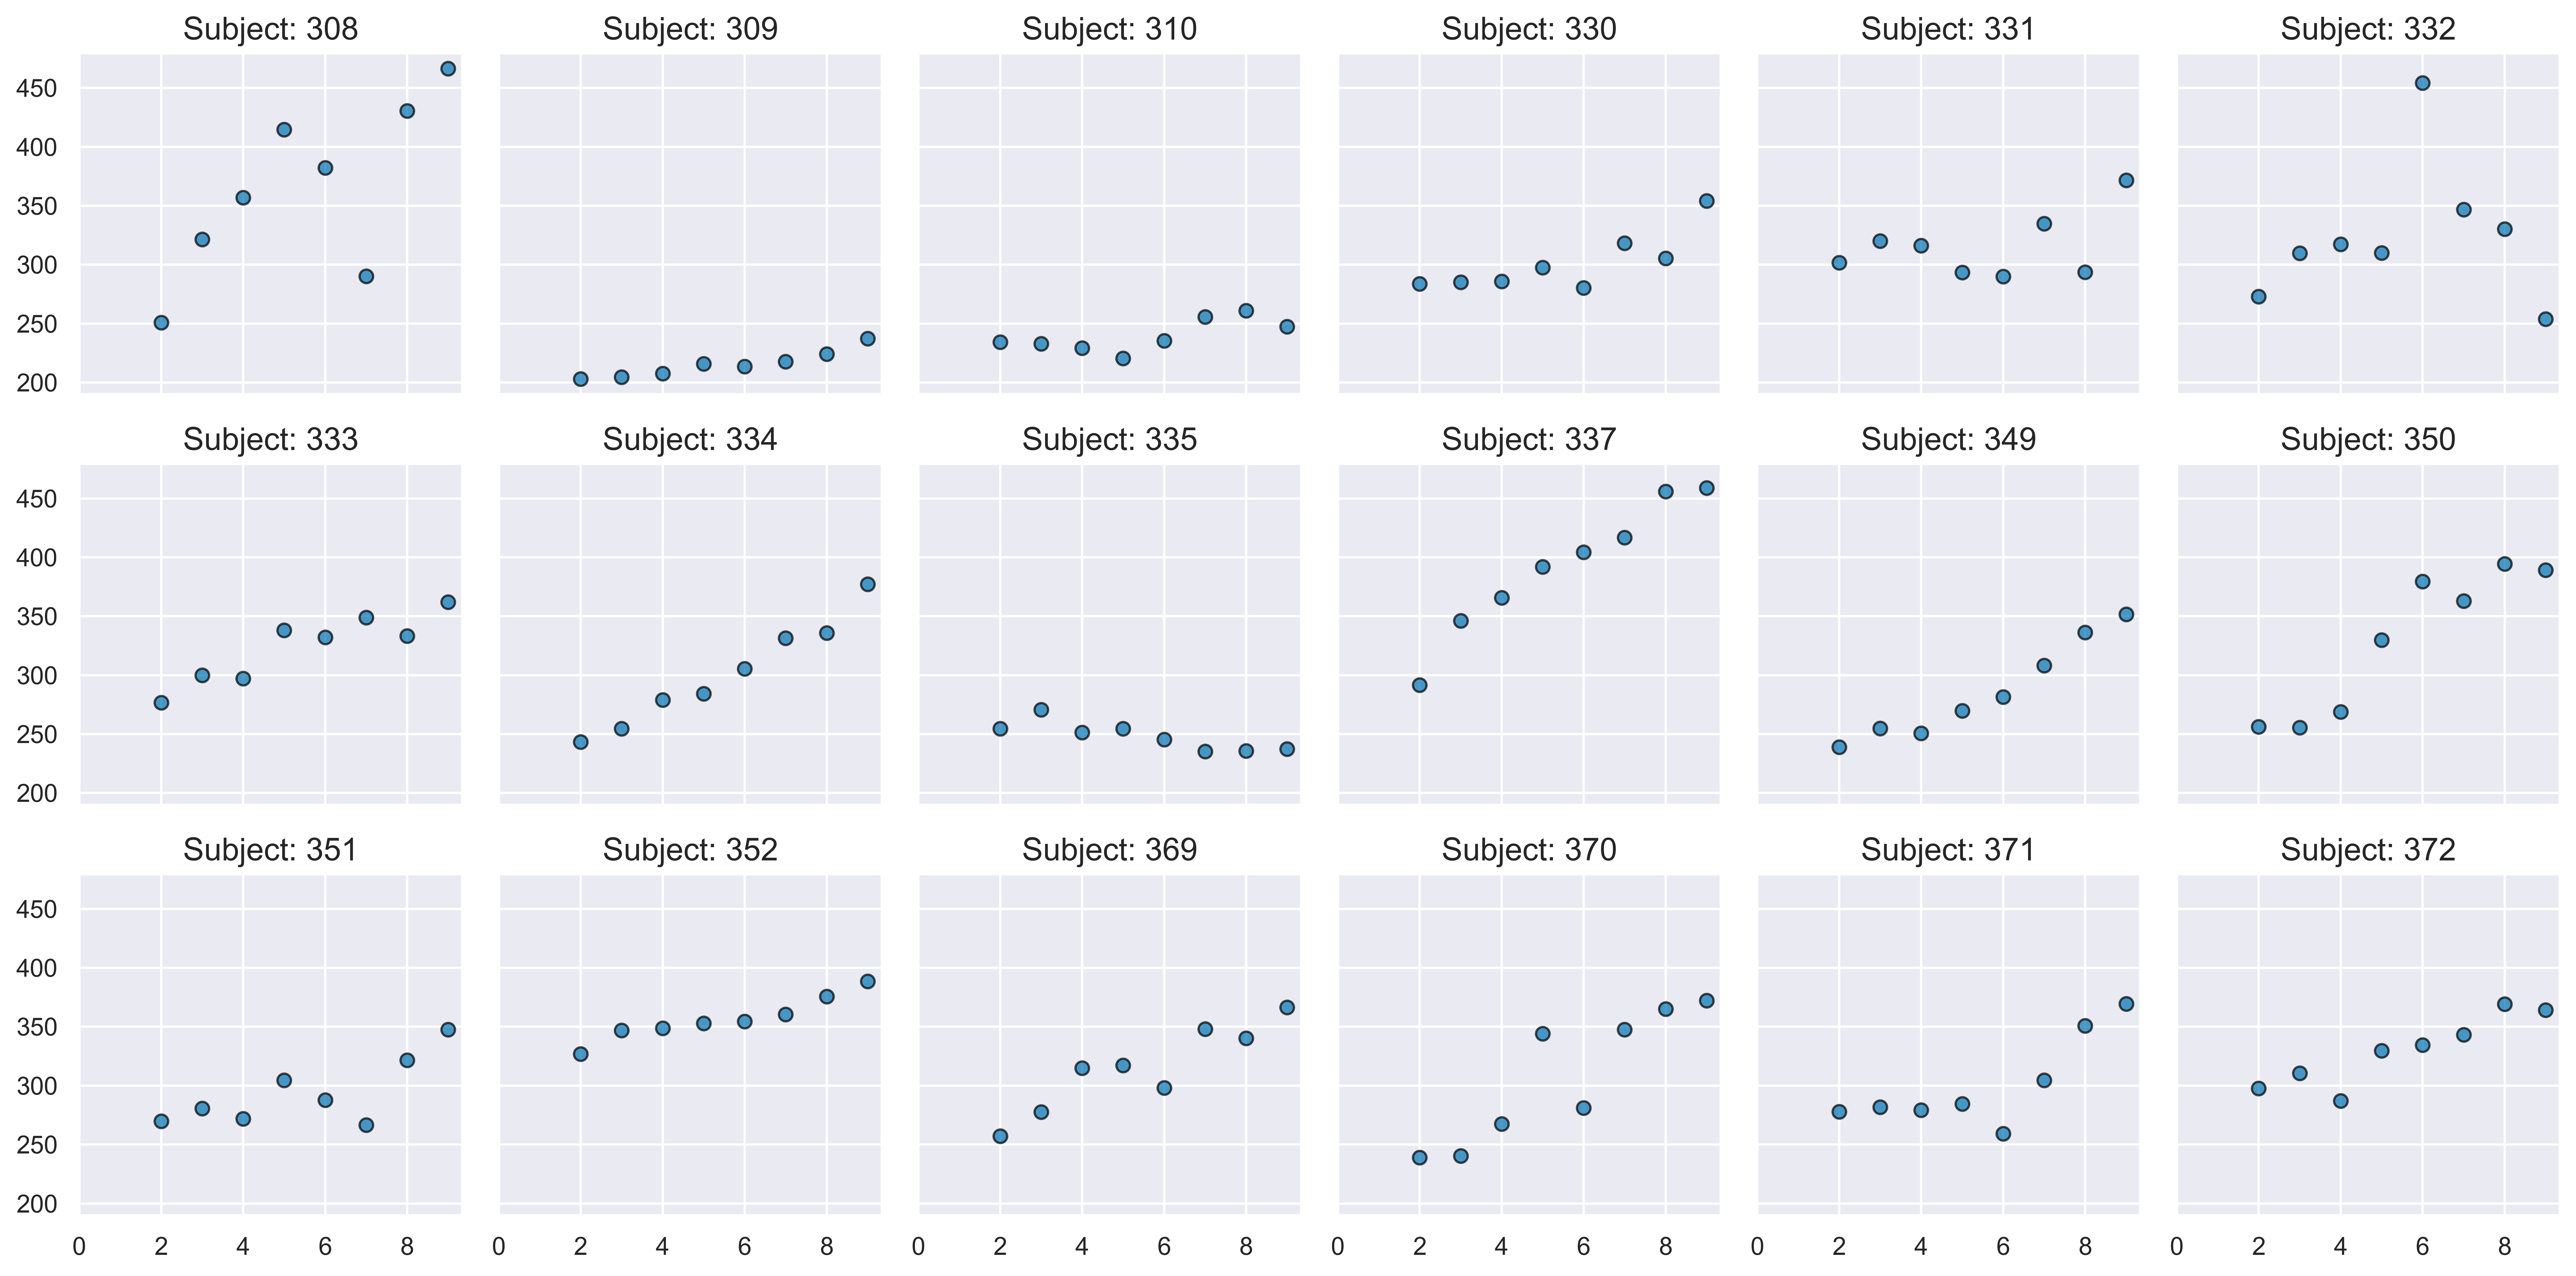

In [6]:
plot_data(data)
plt.tight_layout();

In [7]:
model_pooling = bmb.Model("Reaction ~ 1 + Days", data)

In [8]:
results_pooling = model_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:02.468250


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 898.30it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 899.14it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 899.96it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 900.65it/s]


Sampling time = 0:00:02.580513


Transforming variables...


Transformation time = 0:00:00.106217


Computing Log Likelihood...


Log Likelihood time = 0:00:00.195465


In [9]:
az.summary(results_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept       245.47  10.98  224.78   265.60       0.18     0.13   3723.47   
Days             11.36   1.86    7.72    14.67       0.03     0.02   4393.83   
Reaction_sigma   51.22   3.06   45.23    56.66       0.05     0.03   4422.30   

                ess_tail  r_hat  
Intercept        2899.64    1.0  
Days             2897.52    1.0  
Reaction_sigma   3025.60    1.0

In [10]:
model_no_pooling = bmb.Model("Reaction ~ Days * C(Subject)", data=data)
results_no_pooling = model_no_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:01.611346


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   5%|██▋                                                   | 100/2000 [00:03<00:06, 289.27it/s]

Running chain 1:   5%|██▋                                                   | 100/2000 [00:03<00:06, 286.57it/s]

Running chain 3:   5%|██▋                                                   | 100/2000 [00:03<00:06, 282.98it/s]

Running chain 2:   5%|██▋                                                   | 100/2000 [00:03<00:06, 281.84it/s]

Running chain 0:  35%|██████████████████▌                                  | 700/2000 [00:03<00:00, 1955.20it/s]

Running chain 1:  35%|██████████████████▌                                  | 700/2000 [00:03<00:00, 1934.42it/s]

Running chain 2:  35%|██████████████████▌                                  | 700/2000 [00:03<00:00, 1911.00it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:03<00:00, 2132.80it/s]

Running chain 0:  70%|████████████████████████████████████▍               | 1400/2000 [00:03<00:00, 3429.17it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:03<00:00, 3402.91it/s]

Running chain 2:  75%|███████████████████████████████████████             | 1500/2000 [00:03<00:00, 3540.94it/s]

Running chain 3:  75%|███████████████████████████████████████             | 1500/2000 [00:03<00:00, 3425.99it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 595.64it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 595.88it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 596.15it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 596.41it/s]

Sampling time = 0:00:03.532101


Transforming variables...


Transformation time = 0:00:00.136384


Computing Log Likelihood...


Log Likelihood time = 0:00:00.199458


In [11]:
az.summary(results_no_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept             245.47  22.74  200.27   285.68       1.18     0.84   
Days                   21.57   3.81   14.35    28.80       0.20     0.14   
C(Subject)[309]       -53.93  32.91 -114.95     6.81       1.30     0.92   
C(Subject)[310]       -27.14  32.61  -90.89    31.03       1.25     0.89   
C(Subject)[330]        11.78  33.16  -50.57    73.10       1.29     0.91   
C(Subject)[331]        42.86  32.81  -19.87   102.82       1.29     0.91   
C(Subject)[332]        65.76  32.90    1.41   125.85       1.26     0.89   
C(Subject)[333]        18.15  33.10  -43.79    81.87       1.25     0.88   
C(Subject)[334]       -43.69  33.12 -105.27    19.50       1.31     0.93   
C(Subject)[335]        25.69  32.60  -33.21    86.50       1.24     0.88   
C(Subject)[337]        22.57  32.46  -36.22    84.38       1.22     0.87   
C(Subject)[349]       -49.07  33.07 -111.84    11.51       1.31     0.92   
C(Subject)[350]       -44.41  32.84 -105.18    16.52       1.24     0.88   
C(Subject)[351]         1.64  33.13  -58.61    63.51       1.28     0.91   
C(Subject)[352]        71.43  32.47   14.88   135.93       1.31     0.92   
C(Subject)[369]        -6.47  33.45  -71.90    54.22       1.32     0.94   
C(Subject)[370]       -51.98  33.21 -112.61    12.17       1.28     0.91   
C(Subject)[371]       -12.24  32.45  -74.69    45.52       1.27     0.90   
C(Subject)[372]        23.20  32.37  -35.94    86.27       1.31     0.93   
Days:C(Subject)[309]  -17.19   5.53  -27.78    -7.06       0.22     0.16   
Days:C(Subject)[310]  -17.72   5.48  -27.90    -7.32       0.21     0.15   
Days:C(Subject)[330]  -13.59   5.60  -24.78    -3.66       0.22     0.16   
Days:C(Subject)[331]  -16.70   5.56  -26.65    -6.12       0.22     0.15   
Days:C(Subject)[332]  -19.16   5.57  -30.16    -9.08       0.21     0.15   
Days:C(Subject)[333]  -10.70   5.53  -21.59    -0.93       0.21     0.15   
Days:C(Subject)[334]   -3.45   5.55  -14.15     6.72       0.22     0.15   
Days:C(Subject)[335]  -25.75   5.50  -35.53   -15.06       0.21     0.15   
Days:C(Subject)[337]    0.87   5.43   -9.19    11.12       0.21     0.15   
Days:C(Subject)[349]   -5.22   5.49  -15.06     5.63       0.22     0.15   
Days:C(Subject)[350]    1.77   5.48   -8.10    11.99       0.21     0.15   
Days:C(Subject)[351]  -13.07   5.50  -23.51    -3.40       0.21     0.15   
Days:C(Subject)[352]  -14.31   5.50  -24.27    -3.36       0.22     0.16   
Days:C(Subject)[369]   -7.80   5.59  -18.55     2.41       0.23     0.16   
Days:C(Subject)[370]   -0.93   5.53  -11.93     8.84       0.21     0.15   
Days:C(Subject)[371]   -9.25   5.42  -20.02     0.22       0.22     0.15   
Days:C(Subject)[372]  -10.50   5.45  -20.94    -0.50       0.22     0.16   
Reaction_sigma         25.76   1.78   22.33    29.05       0.03     0.02   

                      ess_bulk  ess_tail  r_hat  
Intercept               368.26    905.46   1.01  
Days                    366.37    752.88   1.01  
C(Subject)[309]         639.40   1308.64   1.00  
C(Subject)[310]         677.38   1785.75   1.00  
C(Subject)[330]         660.26   1394.69   1.00  
C(Subject)[331]         653.68   1560.82   1.00  
C(Subject)[332]         682.22   1492.93   1.00  
C(Subject)[333]         702.09   1317.04   1.00  
C(Subject)[334]         640.53   1726.88   1.00  
C(Subject)[335]         685.77   1710.30   1.00  
C(Subject)[337]         703.65   1680.08   1.00  
C(Subject)[349]         641.53   1342.73   1.00  
C(Subject)[350]         700.89   1868.37   1.00  
C(Subject)[351]         667.28   1394.80   1.00  
C(Subject)[352]         615.99   1461.22   1.00  
C(Subject)[369]         640.54   1405.03   1.00  
C(Subject)[370]         674.26   1338.50   1.00  
C(Subject)[371]         651.84   1817.77   1.00  
C(Subject)[372]         608.36   1572.94   1.00  
Days:C(Subject)[309]    628.65   1360.40   1.00  
Days:C(Subject)[310]    659.47   1831.34   1.00  
Days:C(Subject)[330]    637.48   12

In [12]:
246.98 + -55.29

191.69

In [13]:
21.30 + -16.97

4.330000000000002

In [14]:
data_subject_309 = data[data["Subject"] == 309]
data_subject_309.shape

(8, 3)

In [15]:
result = pg.linear_regression(data_subject_309["Days"], data_subject_309["Reaction"])
print(result)

       names        coef        se          T          pval        r2  \
0  Intercept  191.576970  3.723259  51.454104  3.615788e-09  0.890144   
1       Days    4.357144  0.624898   6.972569  4.325982e-04  0.890144   

     adj_r2    CI[2.5%]   CI[97.5%]  
0  0.871834  182.466483  200.687457  
1  0.871834    2.828074    5.886214  


In [16]:
model_partial_pooling = bmb.Model(
    "Reaction ~ 1 + Days + (Days | Subject)", data, categorical="Subject"
)

In [17]:
results_partial_pooling = model_partial_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:01.874257


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3976.11it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3767.55it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3565.60it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3478.10it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:03<00:00, 4298.09it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4671.07it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4490.92it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4388.12it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:03<00:00, 4540.22it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:03<00:00, 4545.55it/s]

Running chain 3:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:03<00:00, 5010.95it/s]

Running chain 2:  75%|███████████████████████████████████████             | 1500/2000 [00:03<00:00, 4393.03it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:03<00:00, 4697.24it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 4418.82it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 4358.10it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 553.15it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 553.34it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 553.58it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 553.87it/s]


Sampling time = 0:00:03.847272


Transforming variables...


Transformation time = 0:00:00.178392


Computing Log Likelihood...


Log Likelihood time = 0:00:00.245859


In [18]:
az.summary(results_partial_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept           245.56   9.49  226.92   262.34       0.19     0.13   
Days                 11.38   1.87    7.66    14.76       0.05     0.03   
Reaction_sigma       26.09   1.82   22.88    29.66       0.03     0.02   
1|Subject_sigma      30.90   8.65   15.71    47.55       0.20     0.14   
Days|Subject_sigma    6.80   1.61    4.10     9.91       0.04     0.03   
1|Subject[308]       10.17  18.52  -26.00    43.72       0.30     0.26   
1|Subject[309]      -42.59  19.92  -79.89    -6.30       0.34     0.24   
1|Subject[310]      -25.90  19.19  -63.19     9.42       0.31     0.24   
1|Subject[330]        4.27  18.50  -31.48    38.53       0.29     0.27   
1|Subject[331]       21.44  18.97  -13.98    56.67       0.33     0.24   
1|Subject[332]       34.44  19.27   -0.73    70.54       0.35     0.25   
1|Subject[333]       10.93  18.12  -20.66    47.89       0.30     0.25   
1|Subject[334]      -21.90  18.58  -56.19    13.14       0.34     0.24   
1|Subject[335]        1.14  19.31  -35.92    36.41       0.31     0.29   
1|Subject[337]       26.07  19.48  -10.55    62.44       0.32     0.24   
1|Subject[349]      -26.95  18.64  -62.97     7.27       0.32     0.23   
1|Subject[350]      -17.16  18.18  -49.45    19.09       0.29     0.23   
1|Subject[351]       -2.63  18.18  -35.60    32.44       0.29     0.28   
1|Subject[352]       42.69  19.53    6.70    80.27       0.35     0.25   
1|Subject[369]       -1.88  17.96  -35.95    31.78       0.28     0.28   
1|Subject[370]      -24.92  19.32  -60.57    10.62       0.32     0.24   
1|Subject[371]       -7.14  18.09  -43.23    24.20       0.29     0.24   
1|Subject[372]       14.49  18.04  -18.72    48.82       0.31     0.23   
Days|Subject[308]     8.14   3.37    2.00    14.52       0.06     0.04   
Days|Subject[309]    -8.33   3.51  -14.86    -2.00       0.07     0.05   
Days|Subject[310]    -7.33   3.38  -13.61    -0.76       0.06     0.04   
Days|Subject[330]    -2.09   3.29   -8.34     3.94       0.06     0.05   
Days|Subject[331]    -3.04   3.35   -9.64     2.75       0.07     0.05   
Days|Subject[332]    -3.90   3.41  -10.24     2.53       0.07     0.05   
Days|Subject[333]     0.56   3.21   -5.38     6.81       0.06     0.04   
Days|Subject[334]     3.16   3.32   -2.84     9.61       0.07     0.05   
Days|Subject[335]   -11.13   3.44  -17.49    -4.72       0.06     0.04   
Days|Subject[337]     9.88   3.45    3.27    16.26       0.07     0.05   
Days|Subject[349]     1.42   3.34   -4.85     7.58       0.07     0.05   
Days|Subject[350]     7.29   3.35    1.23    13.88       0.06     0.05   
Days|Subject[351]    -2.14   3.30   -8.28     4.19       0.06     0.05   
Days|Subject[352]     0.29   3.43   -6.13     6.57       0.07     0.05   
Days|Subject[369]     1.62   3.21   -4.20     7.87       0.06     0.05   
Days|Subject[370]     4.80   3.42   -1.90    11.03       0.06     0.05   
Days|Subject[371]     0.14   3.22   -5.98     6.08       0.06     0.05   
Days|Subject[372]     0.96   3.23   -5.15     7.04       0.06     0.05   

                    ess_bulk  ess_tail  r_hat  
Intercept            2605.88   2973.88    1.0  
Days                 1542.81   1711.13    1.0  
Reaction_sigma       3713.58   2671.94    1.0  
1|Subject_sigma      1789.00   1992.80    1.0  
Days|Subject_sigma   1717.49   2221.50    1.0  
1|Subject[308]       3859.40   2845.22    1.0  
1|Subject[309]       3300.36   2634.49    1.0  
1|Subject[310]       3799.22   2945.74    1.0  
1|Subject[330]       4050.65   2933.51    1.0  
1|Subject[331]       3327.01   3008.24    1.0  
1|Subject[332]       3108.77   2415.76    1.0  
1|Subject[333]       3613.28   2732.10    1.0  
1|Subject[334]       2964.93   3023.44    1.0  
1|Subject[335]       3934.37   3136.78    1.0  
1|Subject[337]       3583.87   3246.23    1.0  
1|Subject[349]       3389.64   3372.79    1.0  
1|Subject[350]       3883.39   2972.05    1.0  
1|Subject[351]       3914.73   3278.06    1.0  
1

In [19]:
245.25 + -43.14

202.11

In [20]:
11.33 + -8.14

3.1899999999999995

In [21]:
az.summary(results_partial_pooling, var_names=["Intercept", "Days"], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  245.56  9.49  226.92   262.34       0.19     0.13   2605.88   
Days        11.38  1.87    7.66    14.76       0.05     0.03   1542.81   

           ess_tail  r_hat  
Intercept   2973.88    1.0  
Days        1711.13    1.0

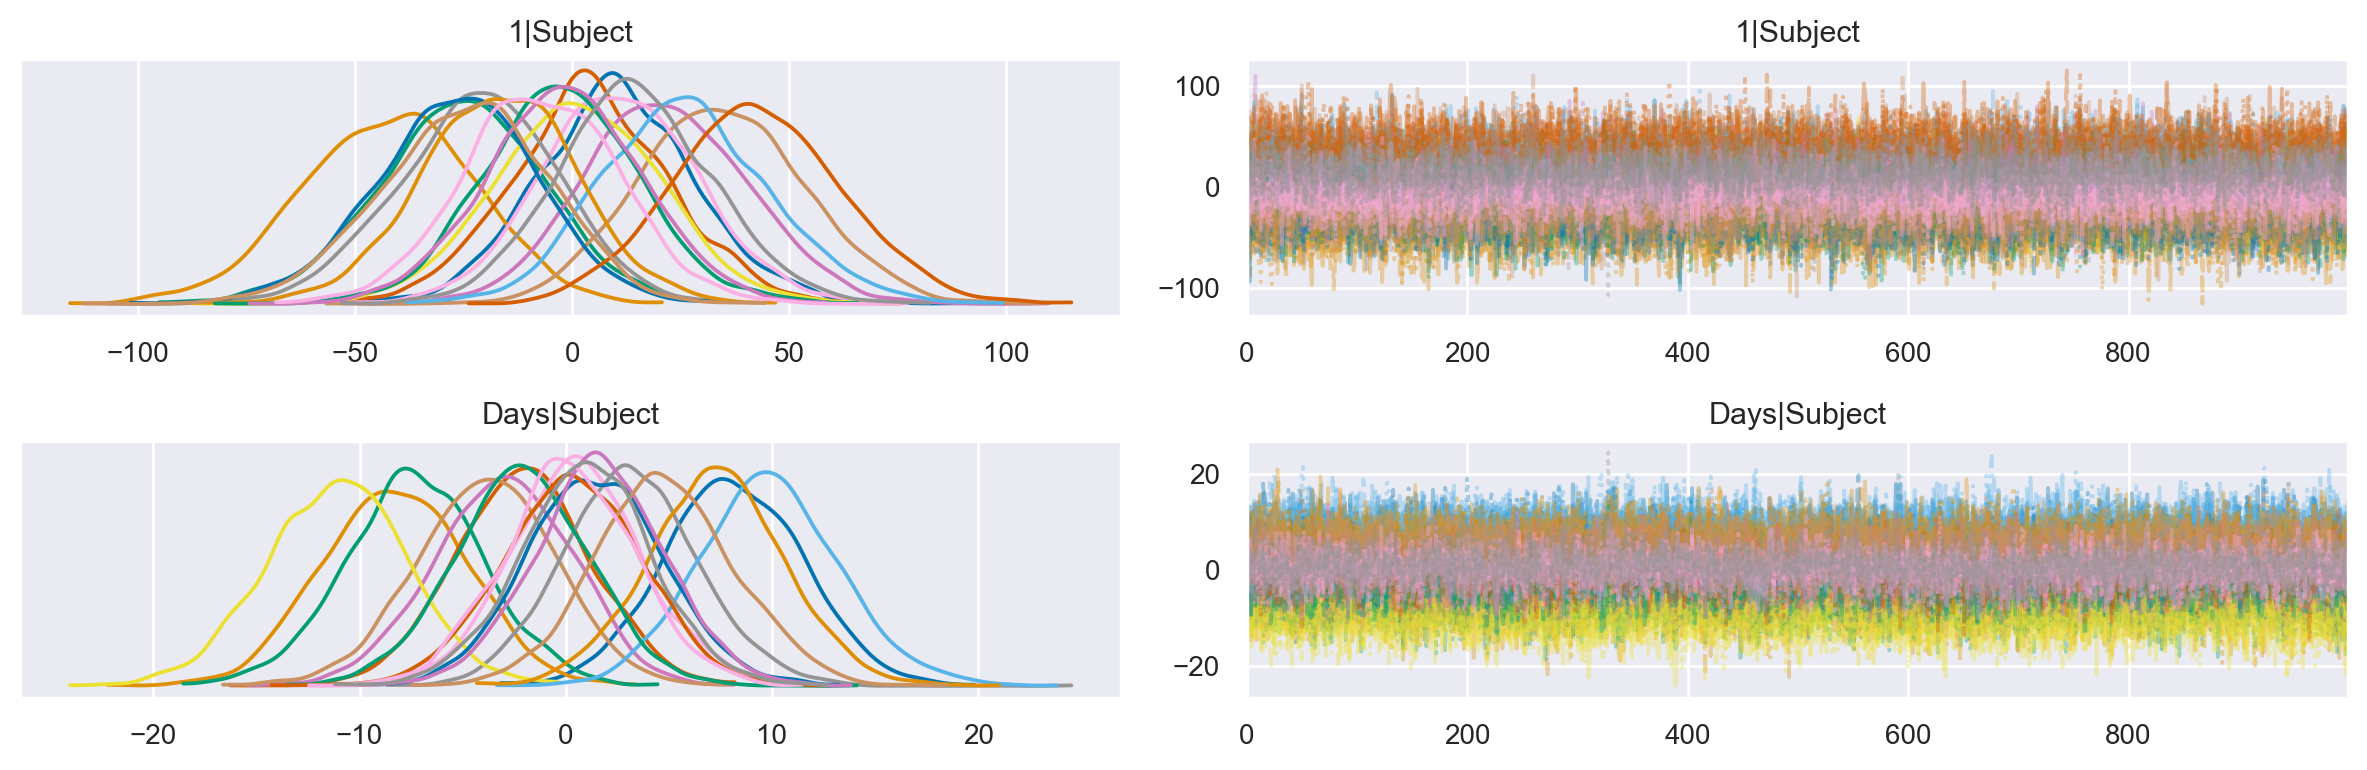

In [22]:
az.plot_trace(
    results_partial_pooling, combined=True, var_names=["1|Subject", "Days|Subject"]
)
plt.tight_layout()

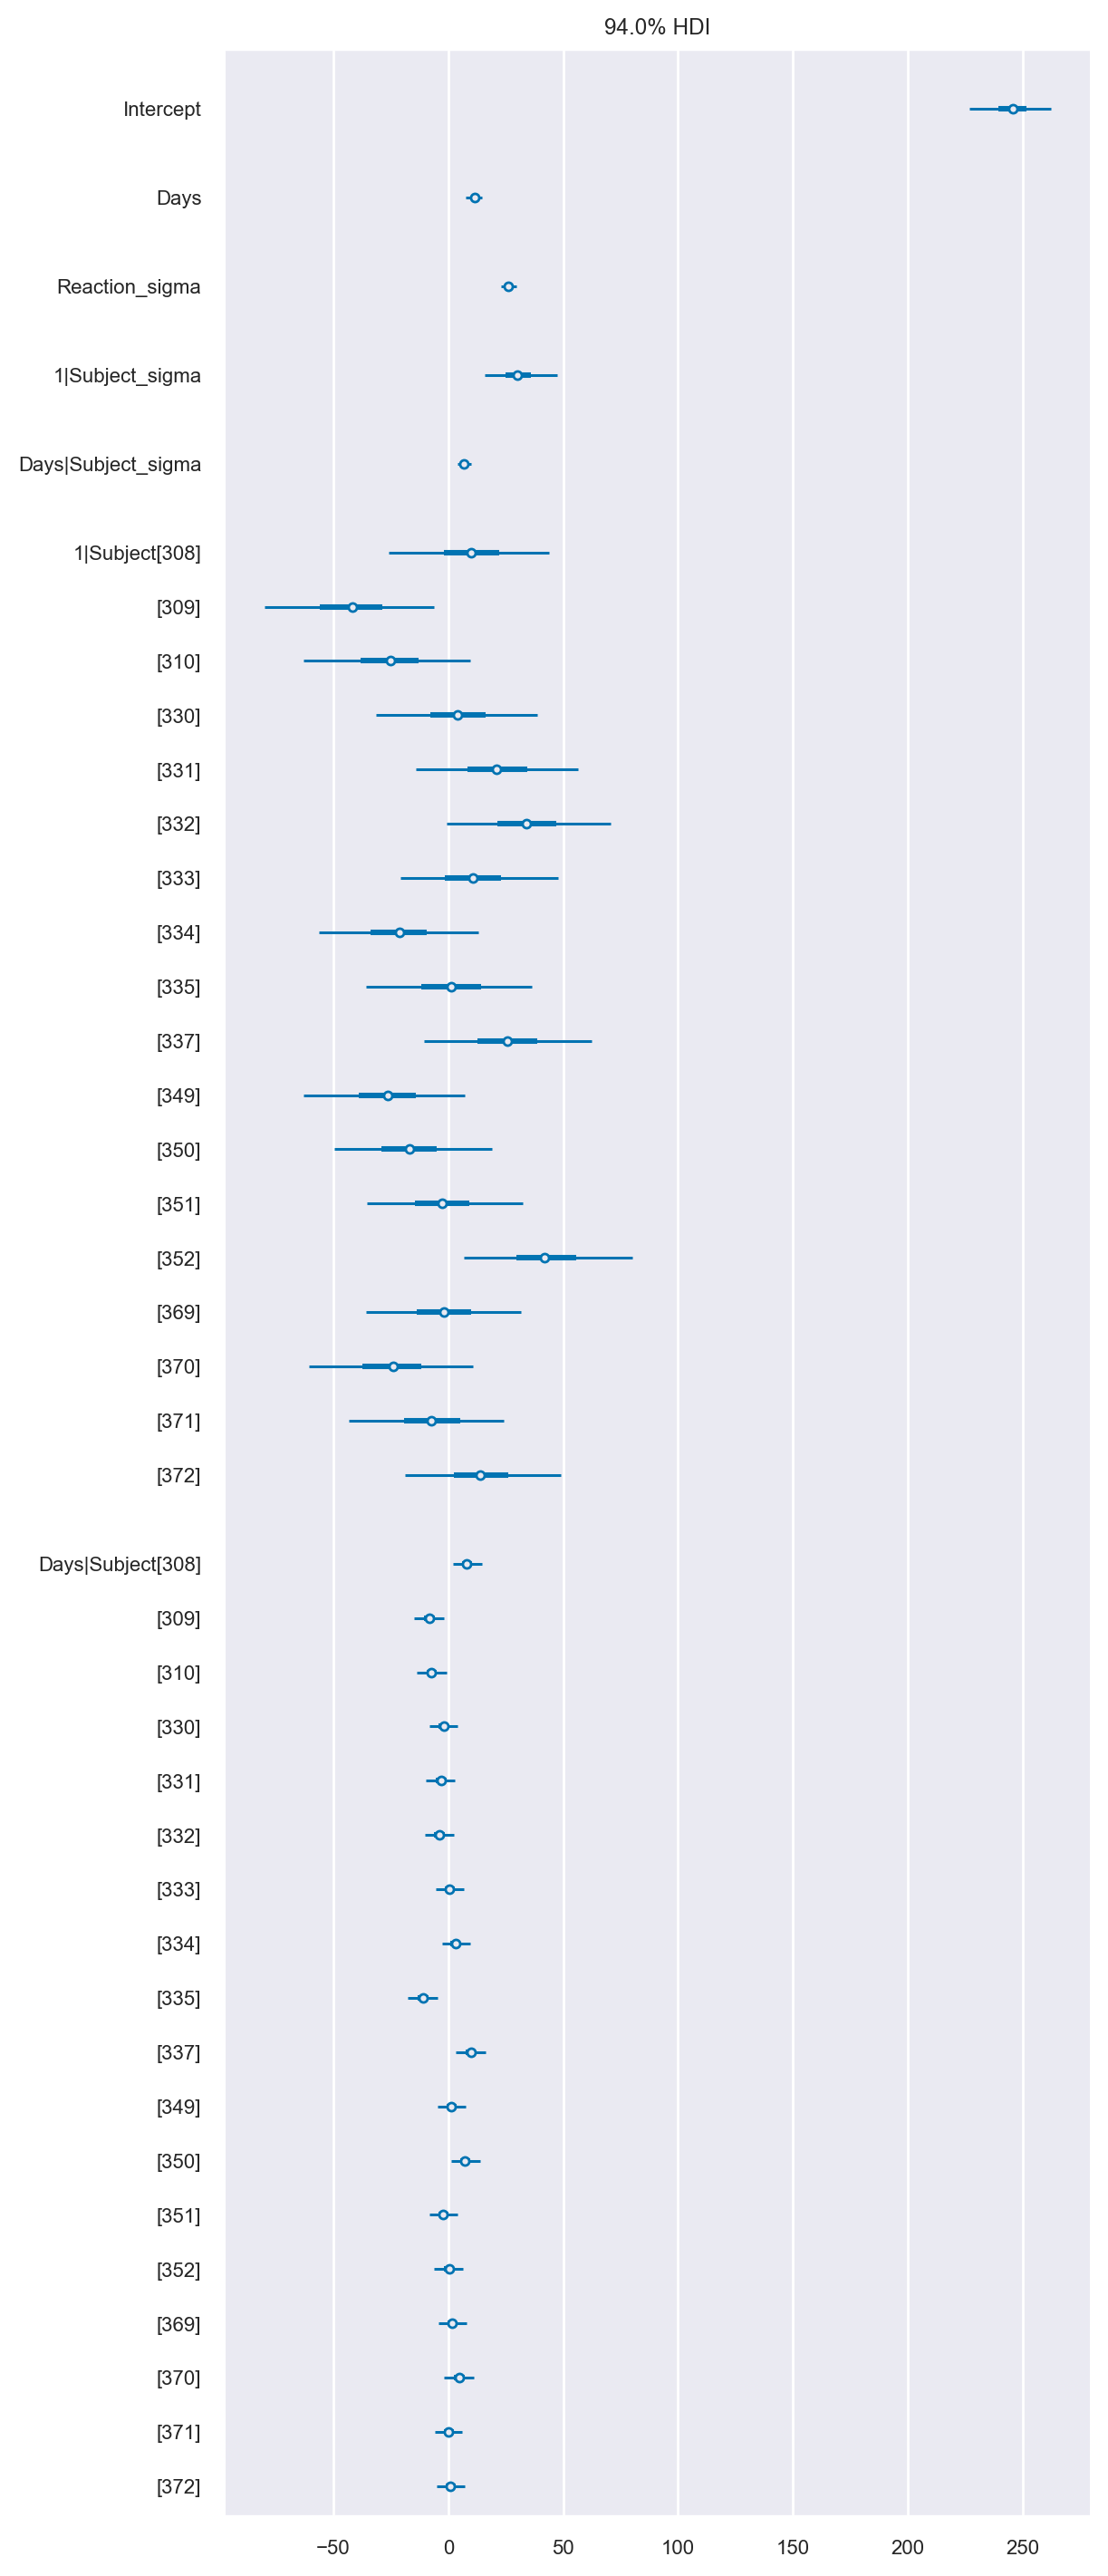

In [23]:
az.plot_forest(data=results_partial_pooling, r_hat=False, combined=True, textsize=8);

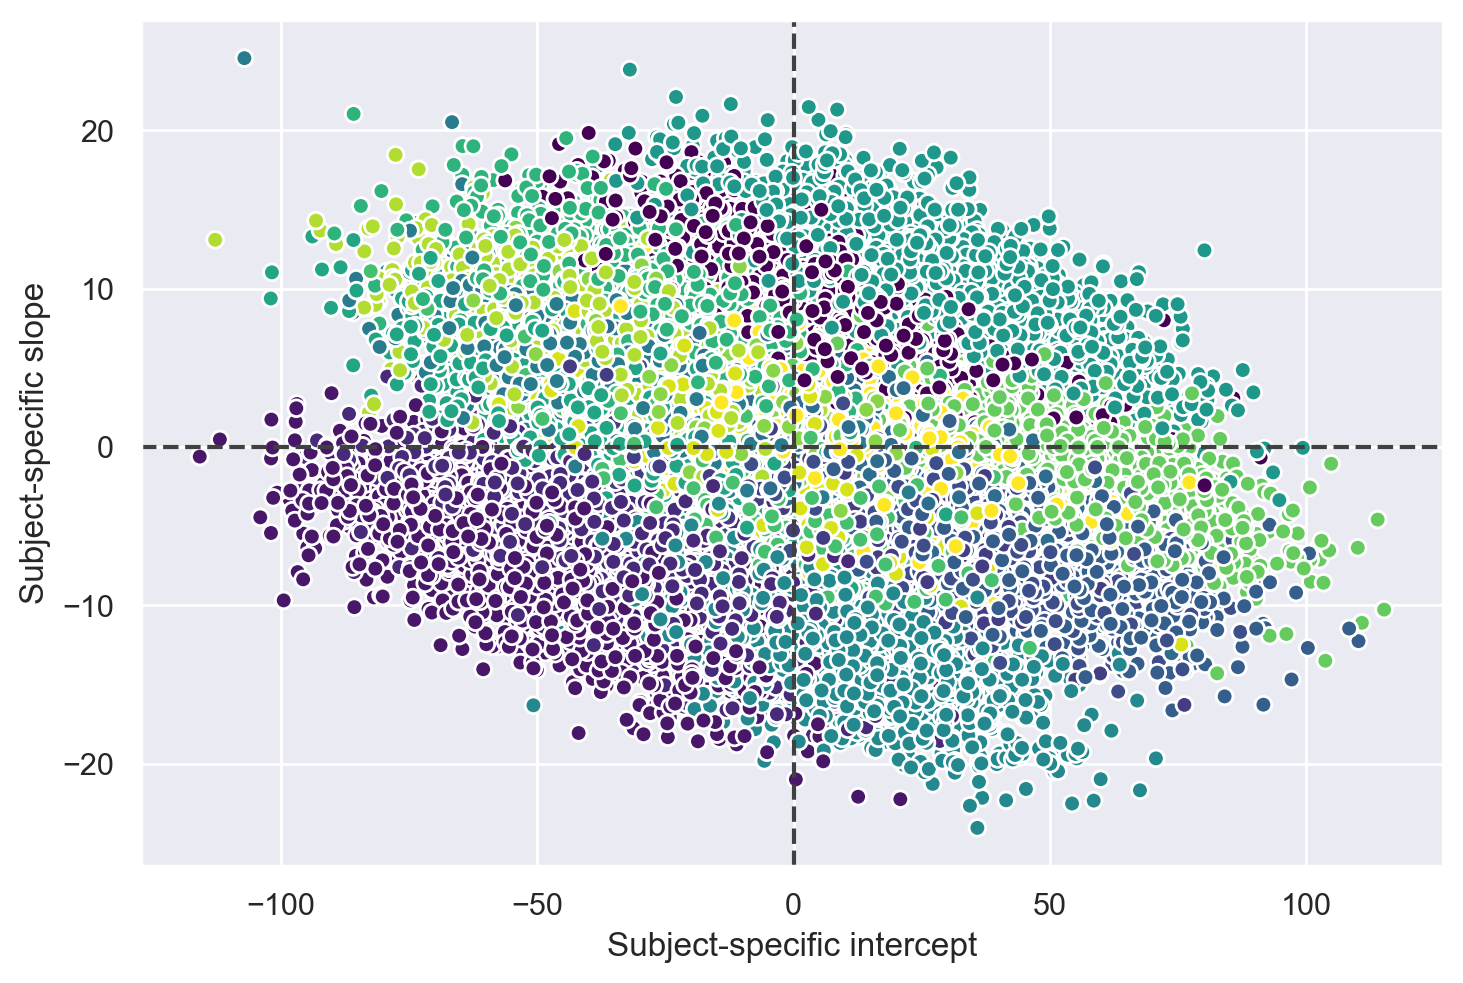

In [24]:
#  extract a subsample from the posterior and stack the chain and draw dims
posterior = az.extract(results_partial_pooling, num_samples=500)

_, ax = plt.subplots()

results_partial_pooling.posterior.plot.scatter(
    x="1|Subject", y="Days|Subject",
    hue="Subject__factor_dim",
    add_colorbar=False,
    add_legend=False,
    cmap="viridis",
    edgecolors=None,
)

ax.axhline(c="0.25", ls="--")
ax.axvline(c="0.25", ls="--")
ax.set_xlabel("Subject-specific intercept")
ax.set_ylabel("Subject-specific slope");

In [25]:
models_dict = {
    "pooling": results_pooling,
    "no_pooling": results_no_pooling,
    "partial_pooling": results_partial_pooling
}
df_compare = az.compare(models_dict)
df_compare

rank    elpd_loo      p_loo  elpd_diff    weight         se  \
partial_pooling     0 -691.873575  30.136117   0.000000  0.788699  21.269008   
no_pooling          1 -694.878338  36.507771   3.004763  0.161502  22.002219   
pooling             2 -772.160430   3.033118  80.286855  0.049800   8.991967   

                       dse  warning scale  
partial_pooling   0.000000     True   log  
no_pooling        3.591068     True   log  
pooling          19.907327    False   log

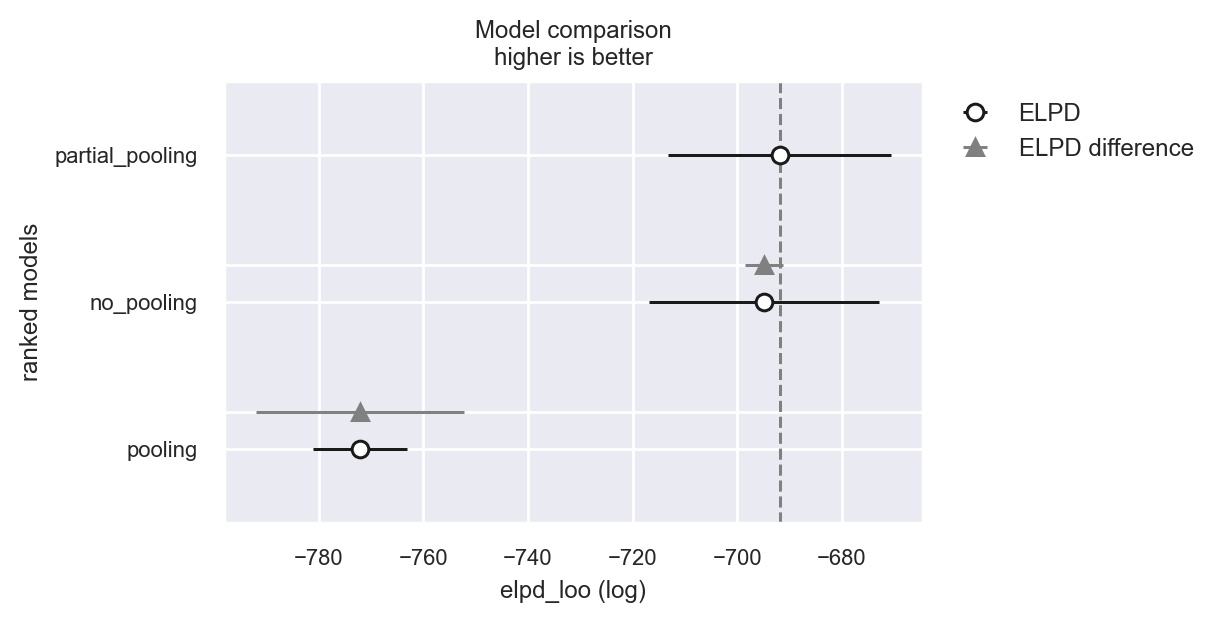

In [26]:
az.plot_compare(df_compare, insample_dev=False);

In [27]:
model_pooling_fitted = model_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_pooling.predict(model_pooling_fitted, kind="pps")

Compiling...


Compilation time = 0:00:00.871858


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 952.81it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 953.33it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 954.00it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 954.64it/s]


Sampling time = 0:00:02.215110


Transforming variables...


Transformation time = 0:00:00.061310


Computing Log Likelihood...


Log Likelihood time = 0:00:00.145963


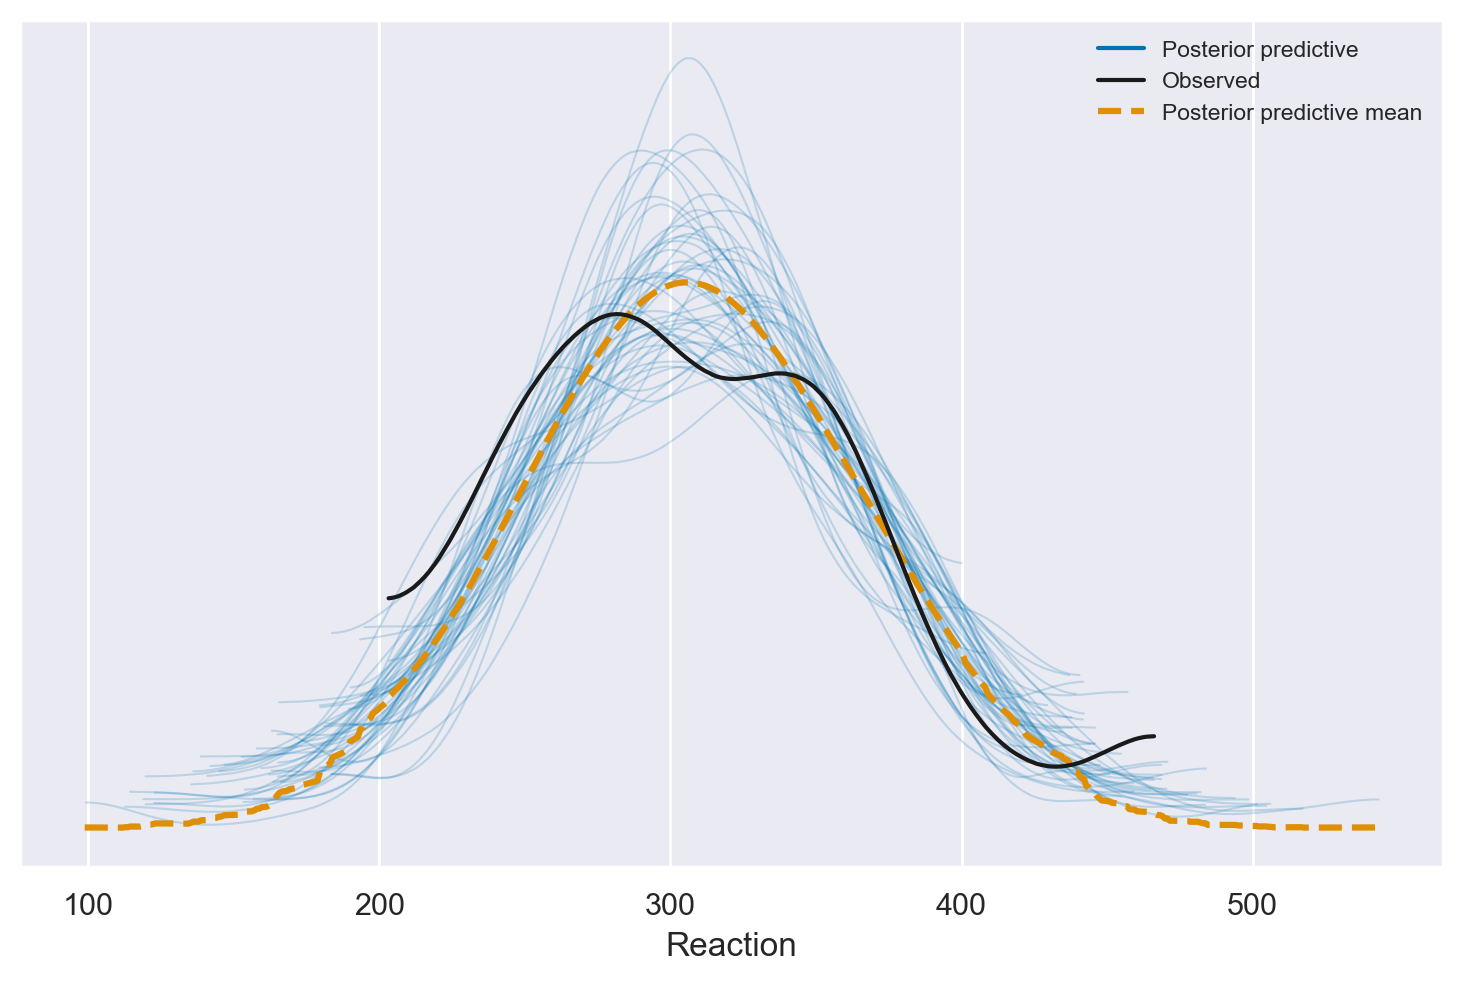

In [28]:
az.plot_ppc(model_pooling_fitted, num_pp_samples=50);

In [29]:
model_no_pooling_fitted = model_no_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_no_pooling.predict(model_no_pooling_fitted, kind="pps");

Compiling...


Compilation time = 0:00:01.412526


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   5%|██▋                                                   | 100/2000 [00:03<00:06, 294.44it/s]

Running chain 1:   5%|██▋                                                   | 100/2000 [00:03<00:06, 286.16it/s]

Running chain 0:   5%|██▋                                                   | 100/2000 [00:03<00:06, 278.07it/s]

Running chain 3:   5%|██▋                                                   | 100/2000 [00:03<00:07, 259.93it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:03<00:00, 1657.63it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:03<00:00, 1633.38it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:03<00:00, 1616.54it/s]

Running chain 3:  35%|██████████████████▌                                  | 700/2000 [00:03<00:00, 1748.46it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:03<00:00, 2873.80it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:03<00:00, 3105.23it/s]

Running chain 0:  65%|█████████████████████████████████▊                  | 1300/2000 [00:03<00:00, 3044.70it/s]

Running chain 3:  65%|█████████████████████████████████▊                  | 1300/2000 [00:03<00:00, 2896.40it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:03<00:00, 3740.82it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:03<00:00, 3902.35it/s]

Running chain 0:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:03<00:00, 3874.60it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 3888.70it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 585.95it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 586.14it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 586.45it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 586.72it/s]


Sampling time = 0:00:03.558055


Transforming variables...


Transformation time = 0:00:00.105202


Computing Log Likelihood...


Log Likelihood time = 0:00:00.192238


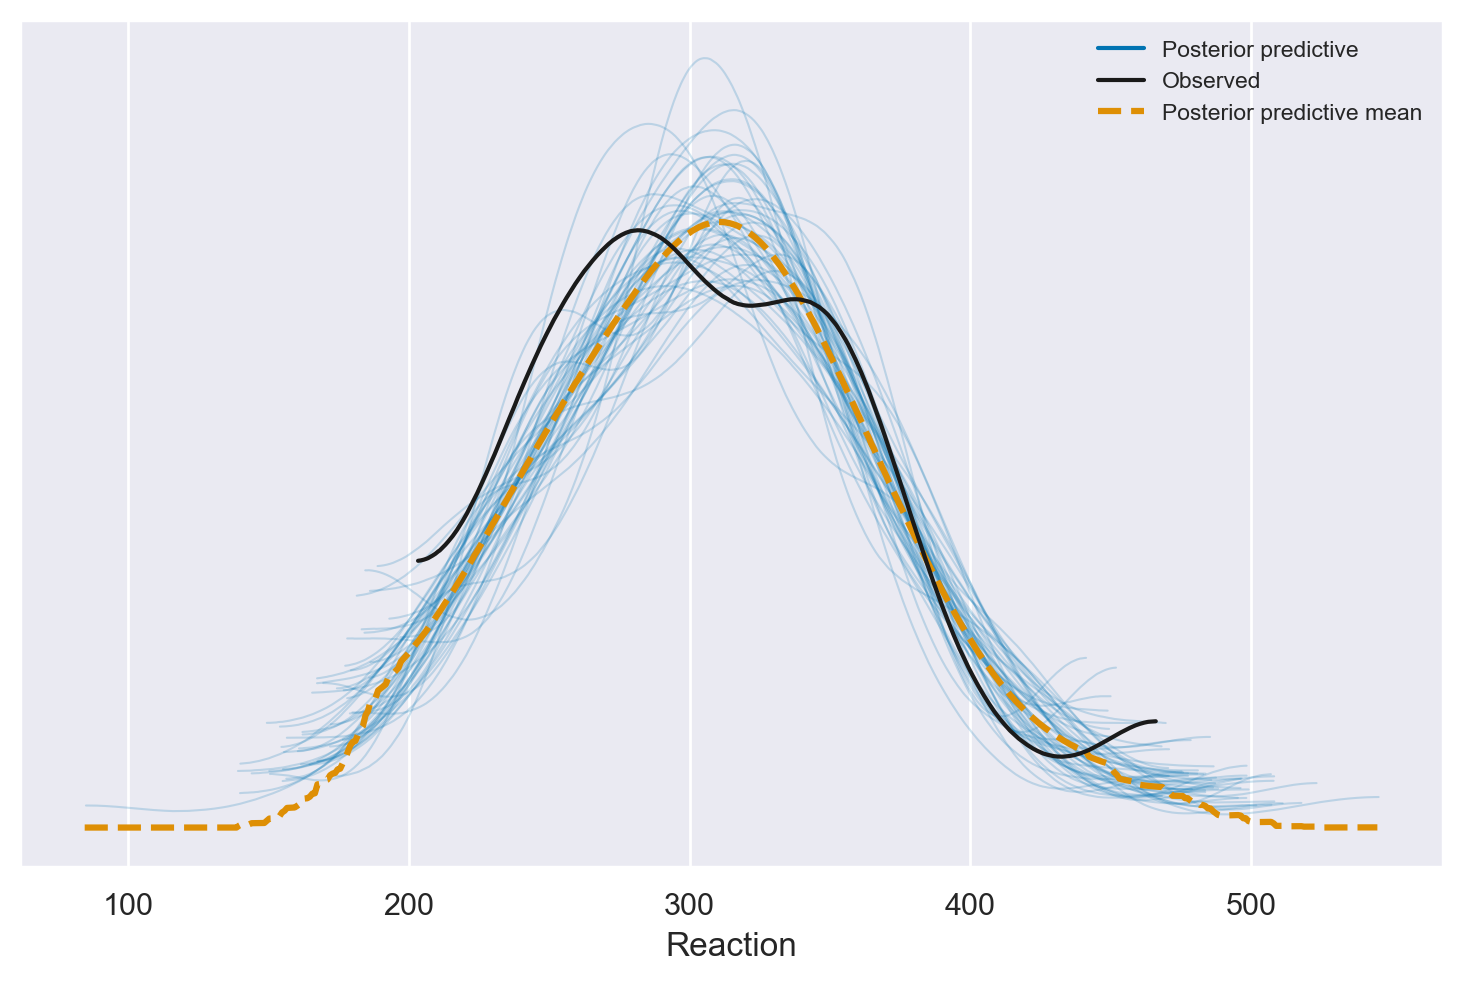

In [30]:
az.plot_ppc(model_no_pooling_fitted, num_pp_samples=50);

In [31]:
model_partial_pooling_fitted = model_partial_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_partial_pooling.predict(model_partial_pooling_fitted, kind="pps");

Compiling...


Compilation time = 0:00:01.785339


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:03<?, ?it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3916.78it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3866.07it/s]

Running chain 1:  15%|███████▉                                             | 300/2000 [00:03<00:00, 2889.50it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:03<00:00, 3561.73it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4963.98it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4961.08it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:03<00:00, 4491.22it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:03<00:00, 4689.35it/s]

Running chain 0:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:03<00:00, 5424.84it/s]

Running chain 1:  75%|███████████████████████████████████████             | 1500/2000 [00:03<00:00, 5007.98it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:03<00:00, 5525.50it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:03<00:00, 4940.61it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 568.51it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 568.70it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 568.96it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 569.18it/s]

Sampling time = 0:00:03.699627


Transforming variables...


Transformation time = 0:00:00.135023


Computing Log Likelihood...


Log Likelihood time = 0:00:00.240652


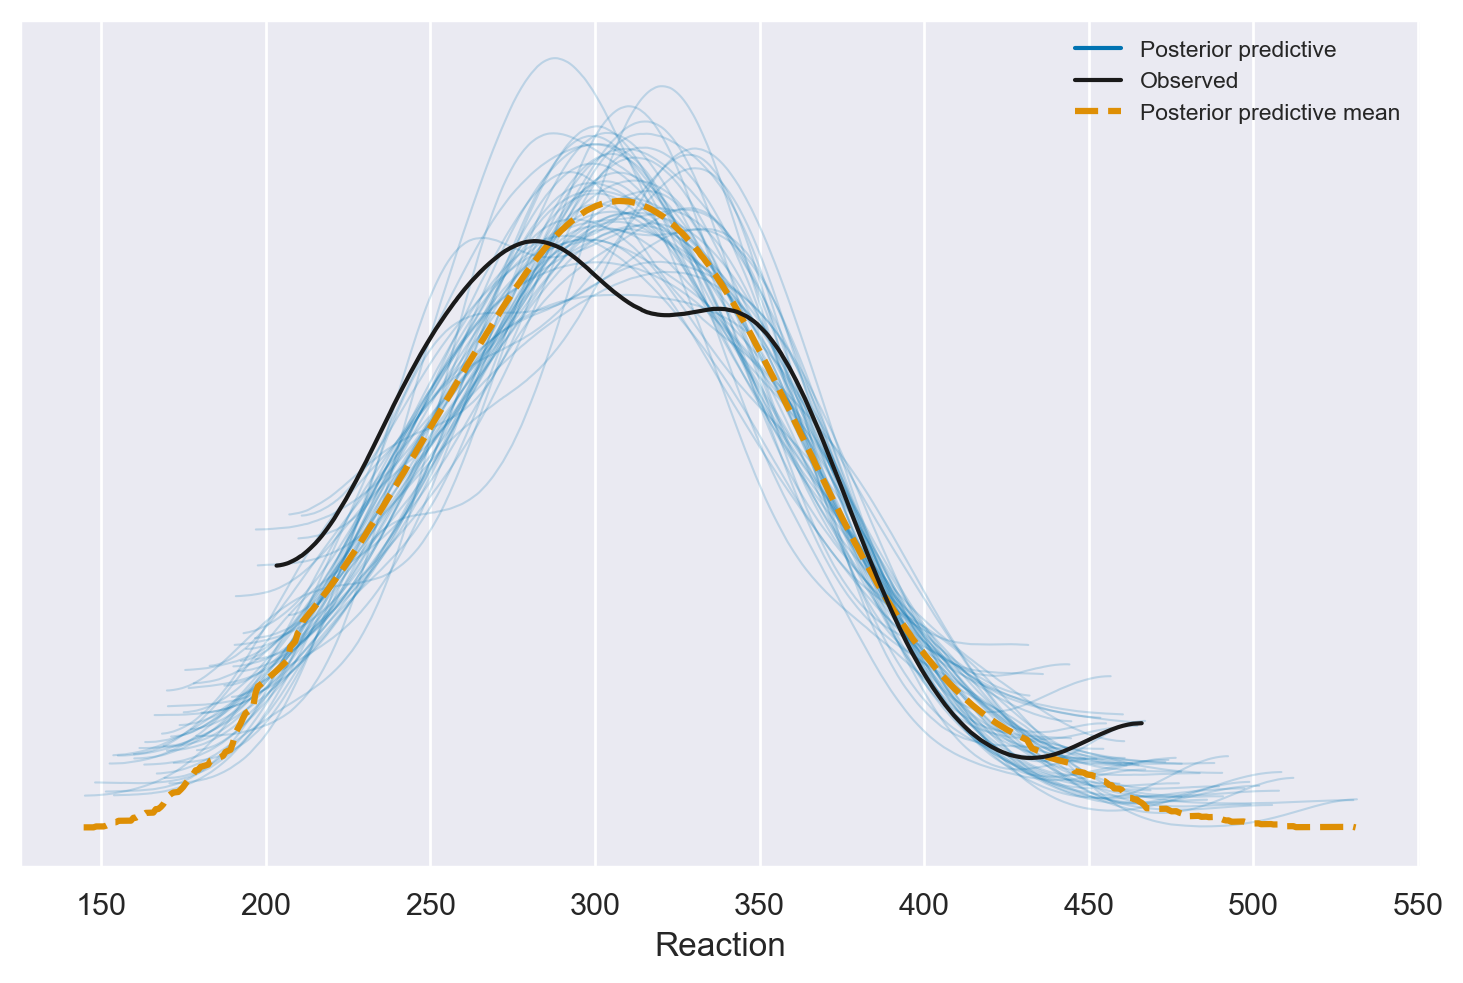

In [32]:
az.plot_ppc(model_partial_pooling_fitted, num_pp_samples=50);

In [33]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 26 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
pingouin  : 0.5.3
pymc      : 5.10.3
bambi     : 0.13.0
numpy     : 1.26.2
matplotlib: 3.8.2
arviz     : 0.17.0
xarray    : 2023.12.0
seaborn   : 0.13.0

Watermark: 2.4.3

